In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# CASE STUDY:
## DATA EXPLORATORY ANALYSIS AND HYPOTHESIS TESTING FOR INSURANCE CLAIMS DATA


###  1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [4]:
claims= pd.read_csv("C:\Analytixlabs\Learning\Python for Data Science\Case Study\Python Foundation Case Study 3 - Insurance Claims Case Study\claims.csv")
claims.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No


In [6]:
cust= pd.read_csv("C:\Analytixlabs\Learning\Python for Data Science\Case Study\Python Foundation Case Study 3 - Insurance Claims Case Study\cust_demographics.csv")
cust.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver


In [13]:
cust_claim= pd.merge(left= cust, right= claims,
                    left_on='CUST_ID', right_on='customer_id',
                    how= 'outer' , indicator= True)
cust_claim.drop(columns= 'customer_id', inplace= True)

In [55]:
cust_claim

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,_merge,Flag
0,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,both,1
1,75740424.0,Female,2070-01-13,ME,265-543-1264,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,both,0
2,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,both,1
3,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,63017412.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,both,1
5,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver,91609100.0,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1.0,No,both,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,19269962.0,Male,NaT,NY,NaN,Gold,45052103.0,Driver error,2017-12-03,Auto,No,Injury only,29010.0,1.0,No,right_only,1
1099,19269962.0,Male,NaT,NY,NaN,Gold,74995596.0,Crime,2018-06-30,Auto,Unknown,Material only,1805.5,1.0,Yes,right_only,0
1103,19269962.0,Male,NaT,NY,NaN,Gold,10247193.0,Natural causes,2018-03-14,Auto,No,Material only,1520.0,2.0,No,right_only,1
1105,19269962.0,Male,NaT,NY,NaN,Gold,69299345.0,Other causes,2018-03-21,Auto,Unknown,Material and injury,25120.0,1.0,No,right_only,0


### 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [30]:
cust_claim.dtypes

CUST_ID                       float64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
claim_id                      float64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float32
total_policy_claims           float64
fraudulent                     object
_merge                       category
dtype: object

###### Here DateOfBirth and claim_date should be of datetime64 type. Also the claim_amount  here should be of float64. claim_id must be of object type.

In [18]:
cust_claim['claim_date'] = pd.to_datetime(cust_claim['claim_date'], infer_datetime_format= True)

In [22]:
cust_claim['DateOfBirth'] = pd.to_datetime(cust_claim['DateOfBirth'], infer_datetime_format= True)

### 3. Convert the column claim_amount to numeric. 
### Use the appropriate modules/attributes to remove the $ sign.

In [26]:
cust_claim['claim_amount']= cust_claim['claim_amount'].astype(str)
cust_claim['claim_amount']= cust_claim['claim_amount'].str.replace('$',' ')

C:\Users\kroop\AppData\Local\Temp\ipykernel_35004\585481745.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cust_claim['claim_amount']= cust_claim['claim_amount'].str.replace('$',' ')


In [29]:
cust_claim['claim_amount']= pd.to_numeric(cust_claim['claim_amount'], errors= 'coerce', downcast= 'float' )

### 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.


In [42]:
cust_claim['Flag']= np.where(cust_claim['police_report']== 'Unknown',0,1)
cust_claim.head(2)

C:\Users\kroop\AppData\Local\Temp\ipykernel_35004\3157030645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_claim['Flag']= np.where(cust_claim['police_report']== 'Unknown',0,1)


,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,_merge,Flag
0,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,both,1
1,75740424.0,Female,2070-01-13,ME,265-543-1264,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,both,0


### 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records in the data based on the customer ID column

In [40]:
cust_claim= cust_claim.drop_duplicates(subset=['CUST_ID', 'incident_cause'], keep= 'last')

### 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [45]:
cust_claim.isna().sum().head(2)

CUST_ID    5
gender     5
dtype: int64

In [46]:
categ_col= ['CUST_ID', 'gender', 'State', 'Segment', 'claim_id','incident_cause', 
            'claim_area', 'police_report', 'claim_type', 'total_policy_claims', 
            'fraudulent']

In [47]:
cont_col= ['claim_amount']

In [51]:
for var in categ_col:
    cust_claim[var]= cust_claim[var].fillna(cust_claim[var].mode()[0])

C:\Users\kroop\AppData\Local\Temp\ipykernel_35004\1766002321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_claim[var]= cust_claim[var].fillna(cust_claim[var].mode()[0])
C:\Users\kroop\AppData\Local\Temp\ipykernel_35004\1766002321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_claim[var]= cust_claim[var].fillna(cust_claim[var].mode()[0])
C:\Users\kroop\AppData\Local\Temp\ipykernel_35004\1766002321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [60]:
cust_claim[cont_col]= cust_claim[cont_col].fillna(cust_claim['claim_amount'].mean())

C:\Users\kroop\AppData\Local\Temp\ipykernel_35004\4067489697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_claim[cont_col]= cust_claim[cont_col].fillna(cust_claim['claim_amount'].mean())


### 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
##### Children < 18,  Youth 18-30, Adult 30-60, Senior > 60


In [67]:
curr_year = pd.to_datetime('today').year
dob_year = pd.DatetimeIndex(cust_claim['DateOfBirth']).year       
a = dob_year-100                                               
b = curr_year - a
c = curr_year - dob_year
cust_claim['age'] = (np.where(dob_year > curr_year,b,c))

C:\Users\kroop\AppData\Local\Temp\ipykernel_35004\3771945963.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_claim['age'] = (np.where(dob_year > curr_year,b,c))


In [82]:
#Categorising
cust_claim.loc[(cust_claim.age < 18),'AgeGroup'] = 'Children'
cust_claim.loc[(cust_claim.age >=18) & (cust_claim.age <30),'AgeGroup'] = 'Youth'
cust_claim.loc[(cust_claim.age >=30) & (cust_claim.age <60),'AgeGroup'] = 'Adult'
cust_claim.loc[(cust_claim.age >=60),'AgeGroup'] = 'Senior'

In [83]:
cust_claim

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,_merge,Flag,age,AgeGroup
0,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,both,1,43.0,Adult
1,75740424.0,Female,2070-01-13,ME,265-543-1264,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,both,0,52.0,Adult
2,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,both,1,38.0,Adult
3,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,63017412.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,both,1,38.0,Adult
5,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver,91609100.0,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1.0,No,both,0,36.0,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,19269962.0,Male,NaT,NY,NaN,Gold,45052103.0,Driver error,2017-12-03,Auto,No,Injury only,29010.0,1.0,No,right_only,1,NaN,NaN
1099,19269962.0,Male,NaT,NY,NaN,Gold,74995596.0,Crime,2018-06-30,Auto,Unknown,Material only,1805.5,1.0,Yes,right_only,0,NaN,NaN
1103,19269962.0,Male,NaT,NY,NaN,Gold,10247193.0,Natural causes,2018-03-14,Auto,No,Material only,1520.0,2.0,No,right_only,1,NaN,NaN
1105,19269962.0,Male,NaT,NY,NaN,Gold,69299345.0,Other causes,2018-03-21,Auto,Unknown,Material and injury,25120.0,1.0,No,right_only,0,NaN,NaN


### 8. What is the average amount claimed by the customers from various segments?


In [91]:
cust_claim.groupby(by= 'Segment')[['claim_amount']].mean()

,claim_amount
Segment,
Gold,12938.837891
Platinum,12374.092773
Silver,12246.200195


### 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [94]:
cust_claim[cust_claim['claim_date'] < '2018-09-10'].groupby('incident_cause')[['claim_amount']].sum()

,claim_amount
incident_cause,
Crime,726562.250
Driver error,3345192.000
Natural causes,1314515.625
Other causes,3751276.500
Other driver error,3356256.500


### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes? 

In [110]:
cust_claim[(cust_claim['AgeGroup']== 'Adult') & (cust_claim['State'].isin (['TX', 'DE', 'AK'])) &
           (cust_claim['incident_cause'].isin(['Driver error','Other driver error']))].groupby(by = 'State')[['State']].count()

,State
State,
AK,8
DE,10
TX,9


### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

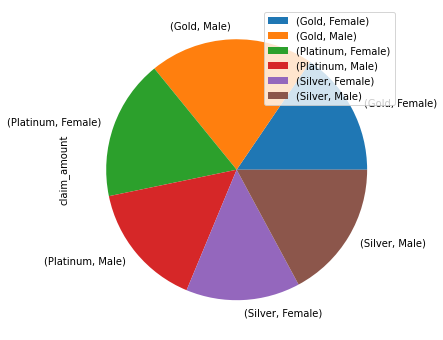

In [135]:
cust_claim.groupby(by= ['Segment','gender']).sum()[['claim_amount']].plot(kind= 'pie', subplots= True, figsize= (18,6) )
plt.show()

In [132]:
cust_claim.pivot_table(index= 'Segment', columns= 'gender', values= 'claim_amount')

gender,Female,Male
Segment,,
Gold,12341.991211,13432.384766
Platinum,12280.642578,12480.735352
Silver,11608.511719,12828.134766


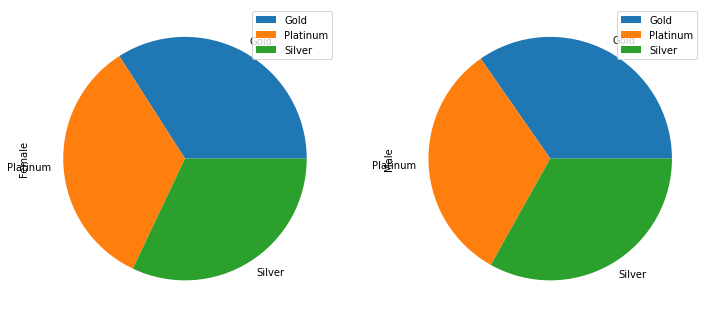

In [136]:
cust_claim.pivot_table(index= 'Segment', columns= 'gender', values= 'claim_amount').plot(kind= 'pie', subplots= True, figsize= (12,6) )
plt.show()

### 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [145]:
cust_claim.loc[cust_claim['incident_cause'].str.lower().str.contains('driver')].groupby(['gender'])[['gender']].count()

,gender
gender,
Female,222
Male,284


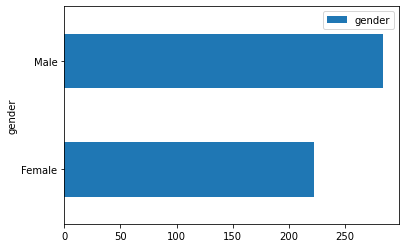

In [164]:
cust_claim.loc[cust_claim['incident_cause'].str.lower().str.contains('driver')].groupby(['gender'])[['gender']].count().plot(kind= 'barh')
plt.show()

#### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.


In [151]:
cust_claim['Fraud']= np.where(cust_claim.fraudulent == "Yes",1,0)

C:\Users\kroop\AppData\Local\Temp\ipykernel_35004\675317584.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_claim['Fraud']= np.where(cust_claim.fraudulent == "Yes",1,0)


In [152]:
cust_claim.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,_merge,Flag,age,AgeGroup,Fraud
0,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,both,1,43.0,Adult,0
1,75740424.0,Female,2070-01-13,ME,265-543-1264,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,both,0,52.0,Adult,0
2,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,both,1,38.0,Adult,1
3,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,63017412.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,both,1,38.0,Adult,0
5,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver,91609100.0,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1.0,No,both,0,36.0,Adult,0


In [153]:
cust_claim.groupby(by= 'AgeGroup')[['Fraud']].sum()

,Fraud
AgeGroup,
Adult,187
Senior,21
Youth,39


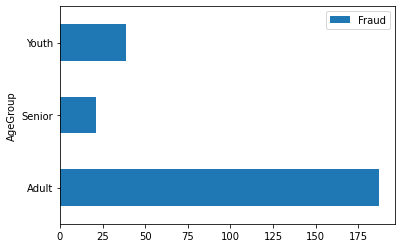

In [163]:
cust_claim.groupby(by= 'AgeGroup')[['Fraud']].sum().plot(kind= 'barh')
plt.show()

### 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order. 

In [157]:
cust_claim['claim_month'] = pd.to_datetime(cust_claim['claim_date'])
cust_claim['claim_month'] = cust_claim['claim_month'].dt.month

C:\Users\kroop\AppData\Local\Temp\ipykernel_35004\3106282593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_claim['claim_month'] = pd.to_datetime(cust_claim['claim_date'])
C:\Users\kroop\AppData\Local\Temp\ipykernel_35004\3106282593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_claim['claim_month'] = cust_claim['claim_month'].dt.month


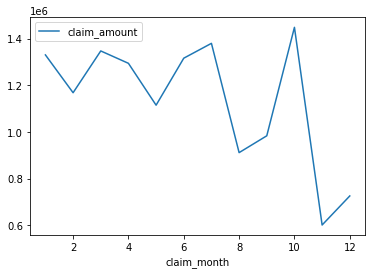

In [162]:
cust_claim.groupby(by= 'claim_month')[['claim_amount']].sum().plot()
plt.show()

### 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [169]:
cust_claim.pivot_table(index= 'gender',columns = 'fraudulent', values= 'claim_amount', aggfunc= np.mean)

fraudulent,No,Yes
gender,,
Female,12403.302734,11077.336914
Male,12333.720703,15130.405273


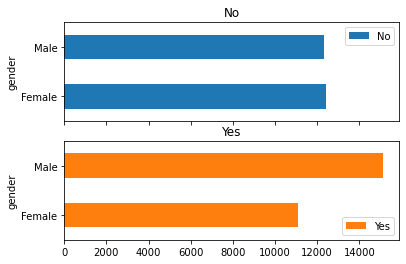

In [171]:
cust_claim.pivot_table(index= 'gender',columns = 'fraudulent', values= 'claim_amount', aggfunc= np.mean).plot(kind= 'barh', subplots= True)
plt.show()

## Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements. 

### 16. Is there any similarity in the amount claimed by males and females?

In [187]:
import scipy.stats as stats